# Data Visualization 
Data visualization is the graphical representation of information and data. By using visual elements like charts, graphs, and maps, data visualization tools provide an accessible way to see and understand trends, outliers, and patterns in data.

## Mapping From Data Space to Graphic Space


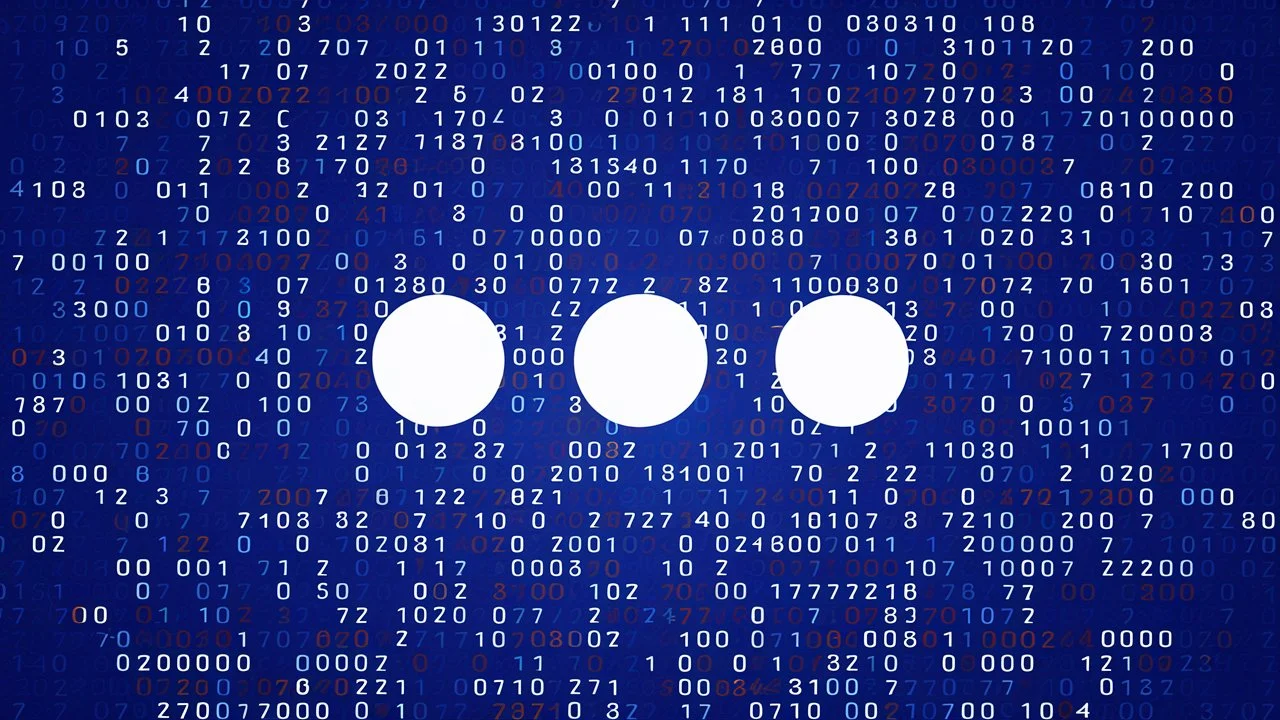

In [16]:
from IPython.display import Image
Image("/kaggle/input/data-space/data_space.jpeg")

## Visualization technology stack
There are following data visualization stack has technologies.
- **Basic mathematics:** trigonometric function, linear algebra, geometric algorithm.
- **Graphics:** Canvas, SVG, WebGL, computational graphics, graph theory.
- **Engineering algorithms:** basic algorithms, statistical algorithms, common layout algorithms.
- **Data analysis:** data cleaning, statistics, data modeling.
- **Design aesthetics:** design principles, aesthetic judgment, color, interaction, cognition.
- **Visual basis:** visual coding, visual analysis, graphical interaction.
- **Visualization solutions:** correct use of charts, visualization of common business scenarios

# Classification of ploting data by their requirements**
- Correlation representation
- Distribution representation
- Variation/Changes representation
- Grouping / Clustering representation
- Ranking representation
- Composition representation

Python has good packages to plot  the data and among them
- Matplotlib
- seaborn


# Matplotlib
One of Matplotlib’s most important features is its ability to play well with many operating systems and graphics backends. Matplotlib supports dozens of backends and output types, which means you can count on it to work regardless of which operating system you are using or which output format you wish. This cross-platform, everything-to-everyone approach has been one of the great strengths of Matplotlib. It has led to a large userbase, which in turn has led to an active developer base and Matplotlib’s powerful tools and ubiquity within the scientific Python world.

# Matplotlib Architecture:
There are overall 3 different layers in the architecture of matplotlib as follows.
- Backend layer.
- Artist layer.
- Scripting layer.

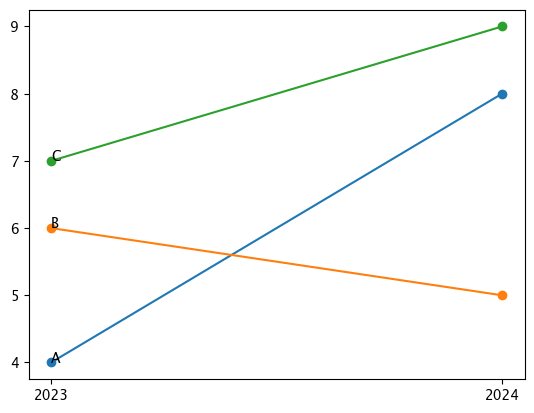

In [17]:
from IPython.display import Image
Image("/kaggle/input/output/output.png")

## Backend layer:
- It is bottom most layer of a Matplotlib architecture.There are 3 main classes from the backend layer Figure Canvas ( the layer/Surface on which the figure will be drawn), Renderer (the classn that takes care of the drawing on the surface ) and Event ( to handle the mouse and keyboard events). We don’t work much with the Backend layer as compared to the counterparts.
## Artist Layer:
- It is what does most of the duty on plotting the various functions, like axis which coordinates on how to use the renderer on the Figure canvas. To put it simple, lets consider Paper as the Figure Canvas and Sketch pen as renderer. Then the hand of the painter is the Artist layer which has certain functions, knows how to sketch to get the exact figure.
## Scripting layer:
- This is the topmost layer on which majority of our codes will play around. For day to day exploratory works, we almost rely on this scripting layer of matplotlib. Pyplot is the scripting layer that provides almost simlar functionality as that of Matlab in python. The methods in scripting layer, almost automatically takes care of the other layers and all we need to care about is the current state(figure & Subplot).

## Importing matplotlib
> We will use some standard shorthands for Matplotlib imports:

In [18]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

## Setting Styles
We will use the plt.style directive to choose appropriate aesthetic styles for our figures. Here we will set the classic style, which ensures that the plots we create use the **classic** Matplotlib style:

In [19]:
plt.style.use('classic')

In [20]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

from matplotlib.path import Path
from matplotlib.patches import PathPatch
from matplotlib.patches import Patch
import matplotlib.patches as patches
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/output/output.png
/kaggle/input/inputfiles/midwest_filter.csv
/kaggle/input/data-space/data_space.jpeg


In [21]:
!pip install calmap
import calmap

In [22]:
!pip install pywaffle
from pywaffle import Waffle

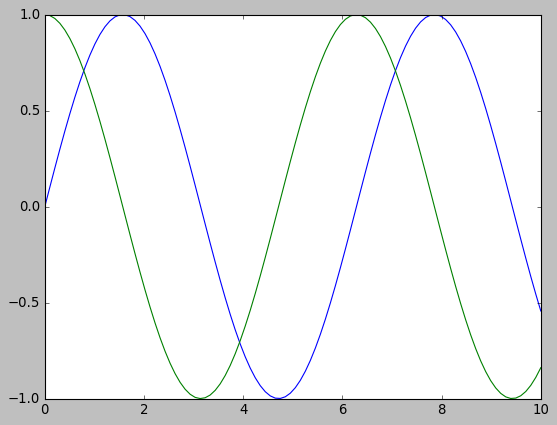

In [23]:
x = np.linspace(0, 10, 100)
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))
plt.show()

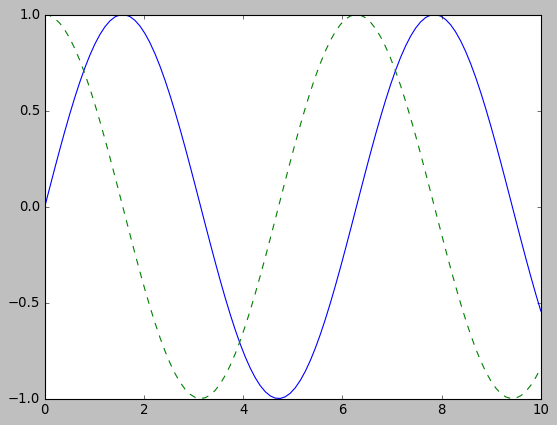

In [24]:
x = np.linspace(0, 10, 100)
fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');plt.show()

# Correlation representation
- Correlation analysis is a statistical method used to evaluate the strength of relationship between two quantitative variables. A high correlation means that two or more variables have a strong relationship with each other, while a weak correlation means that the variables are hardly related.
- Bivariate data sets and provide a visual representation of the relationship between variables.
## Theses plots are uses for correlation representation
-   Scatter plot
-   Bubble plot with Encircling
-   Scatter plot with line of best fit
-   Jittering with stripplot
-   Counts Plot
-   Marginal Histogram
-   Marginal Boxplot
-   Correlogram
-   Pairwise Plot

## 1. Scatter Plot
- Scatter plots gives us a representation of where each points in the entire dataset are present with respect to any 2/3 features(Columns).
- It is a classic and fundamental plot used to study the relationship between two variables.
- In matplotlib, you can conveniently do this using **plt.scatterplot()**.

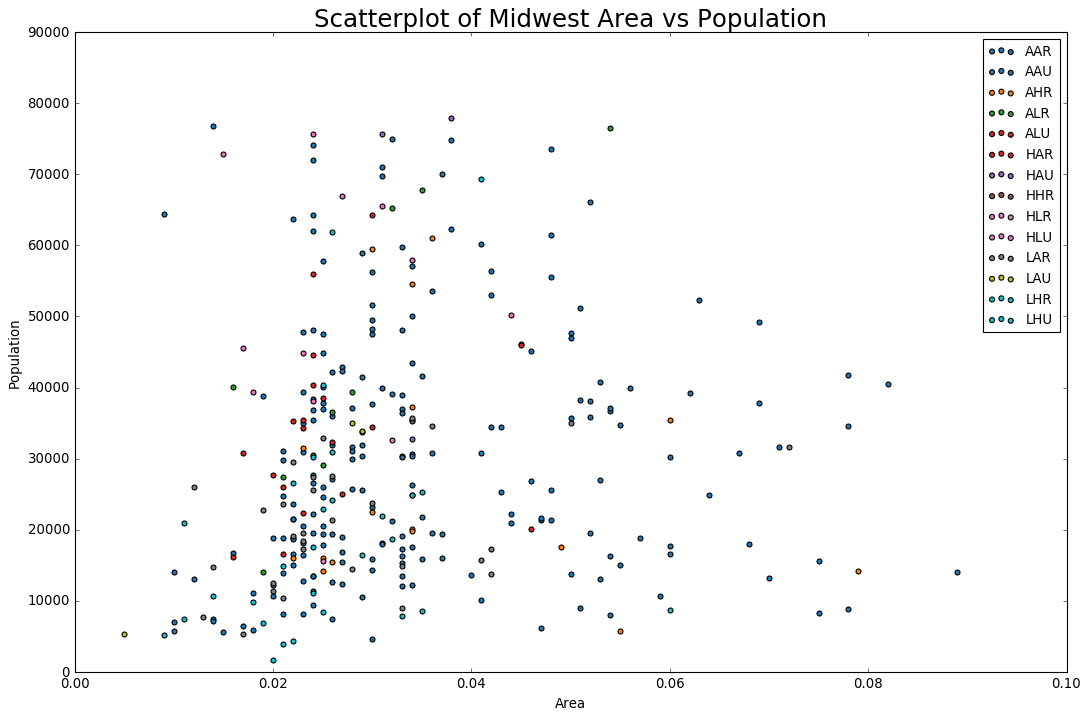

In [25]:
# Import dataset 
midwest = pd.read_csv("/kaggle/input/inputfiles/midwest_filter.csv")

# Prepare Data 
# Create as many colors as there are unique midwest['category']
categories = np.unique(midwest['category'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

# Draw Plot for Each Category
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

for i, category in enumerate(categories):
    plt.scatter('area', 'poptotal', 
                data=midwest.loc[midwest.category==category, :], 
                s=20, c=colors[i], label=str(category))

# Decorations
plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000),
              xlabel='Area', ylabel='Population')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Scatterplot of Midwest Area vs Population", fontsize=22)
plt.legend(fontsize=12)    
plt.show()    

## Bubble plot with Encircling
- A bubble plot is a scatterplot where a third dimension is added: the value of an additional variable is represented through the size of the dots. 
- You need 3 numerical variables as input: one is represented by the X axis, one by the Y axis, and one by the size. Do not forget to provide a legend to make possible the link between the size and the value.
- Area of the circles must be proportional to the value, not to the radius, to avoid exaggerate the variation in your data.

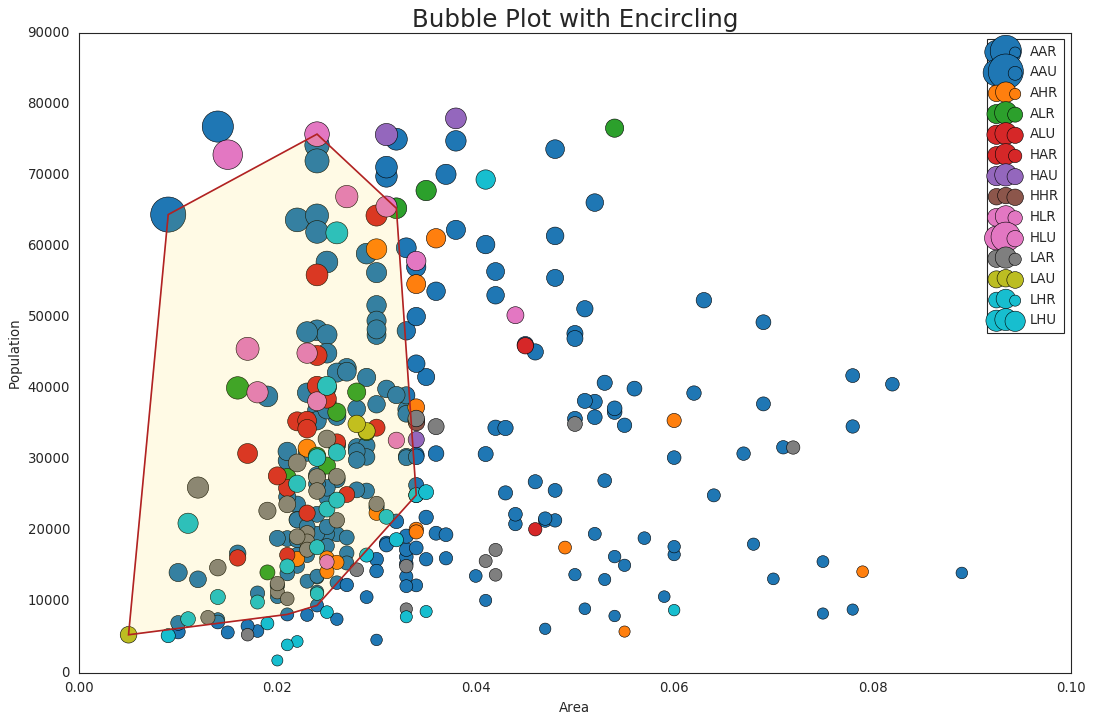

In [26]:
from matplotlib import patches
from scipy.spatial import ConvexHull
import warnings; warnings.simplefilter('ignore')
sns.set_style("white")

# Step 1: Prepare Data
midwest = pd.read_csv("/kaggle/input/inputfiles/midwest_filter.csv")

# As many colors as there are unique midwest['category']
categories = np.unique(midwest['category'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

# Step 2: Draw Scatterplot with unique color for each category
fig = plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')    

for i, category in enumerate(categories):
    plt.scatter('area', 'poptotal', data=midwest.loc[midwest.category==category, :], s='dot_size', c=colors[i], label=str(category), edgecolors='black', linewidths=.5)

# Step 3: Encircling
# https://stackoverflow.com/questions/44575681/how-do-i-encircle-different-data-sets-in-scatter-plot
def encircle(x,y, ax=None, **kw):
    if not ax: ax=plt.gca()
    p = np.c_[x,y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices,:], **kw)
    ax.add_patch(poly)
    # Select data to be encircled
midwest_encircle_data = midwest.loc[midwest.state=='IN', :]                         

# Draw polygon surrounding vertices    
encircle(midwest_encircle_data.area, midwest_encircle_data.poptotal, ec="k", fc="gold", alpha=0.1)
encircle(midwest_encircle_data.area, midwest_encircle_data.poptotal, ec="firebrick", fc="none", linewidth=1.5)

# Step 4: Decorations
plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000),
              xlabel='Area', ylabel='Population')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Bubble Plot with Encircling", fontsize=22)
plt.legend(fontsize=12)    
plt.show()  

## Scatter plot with line of best fit
- A line of best fit can be roughly determined using an eyeball method by drawing a straight line on a scatter plot so that the number of points above the line and below the line is about equal (and the line passes through as many points as possible).

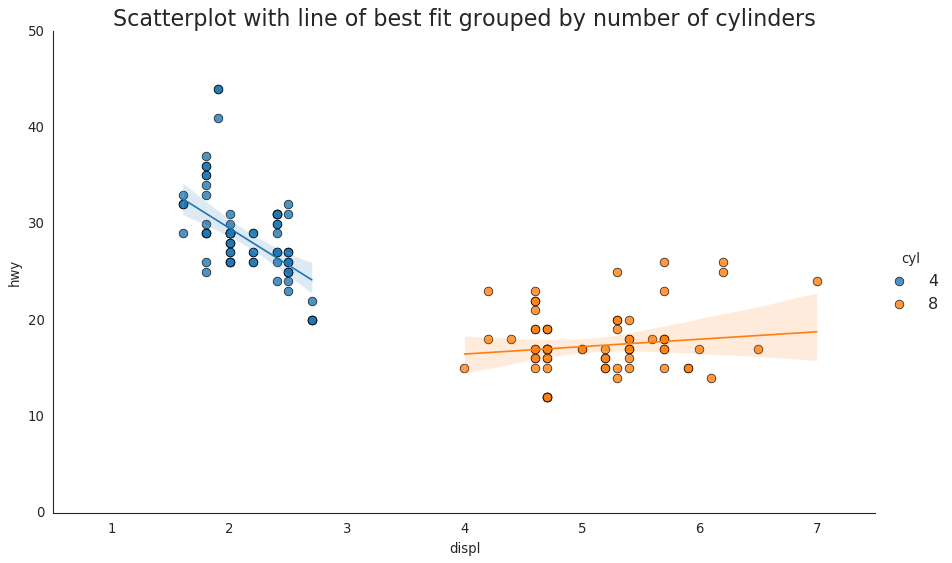

In [31]:
## Importing Data
df = pd.read_csv("/kaggle/input/inputfiles/mpg_ggplot2.csv")
df_select = df.loc[df.cyl.isin([4,8]), :]

# Plot
sns.set_style("white")
gridobj = sns.lmplot(x="displ", y="hwy", hue="cyl", data=df_select, 
                     height=7, aspect=1.6, robust=True, palette='tab10', 
                     scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))

# Decorations
gridobj.set(xlim=(0.5, 7.5), ylim=(0, 50))
plt.title("Scatterplot with line of best fit grouped by number of cylinders", fontsize=20)
plt.show()

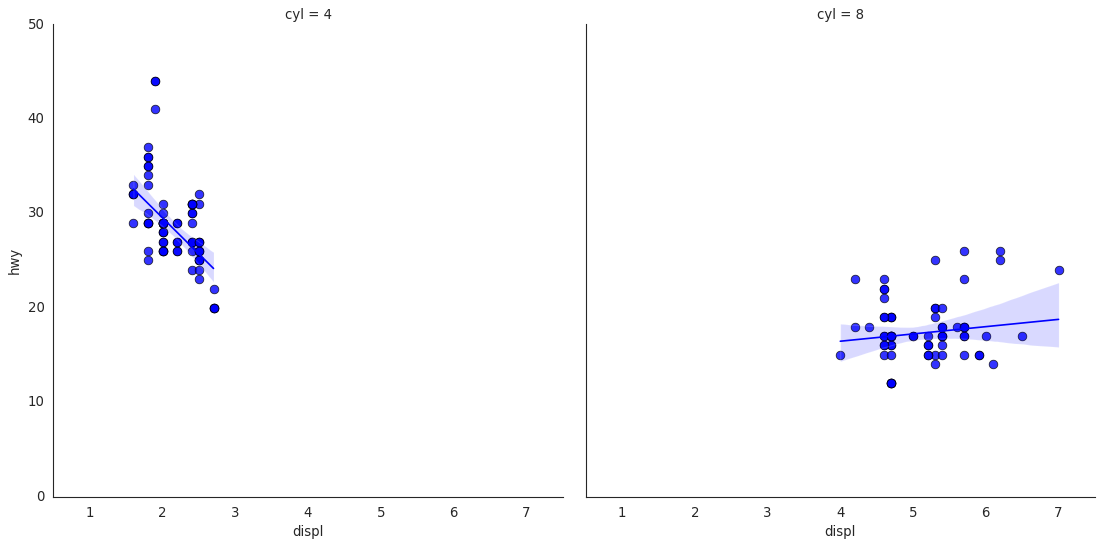

In [32]:
# Import Data
df = pd.read_csv("/kaggle/input/inputfiles/mpg_ggplot2.csv")
df_select = df.loc[df.cyl.isin([4,8]), :]

# Each line in its own column
sns.set_style("white")
gridobj = sns.lmplot(x="displ", y="hwy", 
                     data=df_select, 
                     height=7, 
                     robust=True, 
                     palette='Set1', 
                     col="cyl",
                     scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))

# Decorations
gridobj.set(xlim=(0.5, 7.5), ylim=(0, 50))
plt.show()

## 4. Jittering with stripplot
- A strip plot is a graphical data anlysis technique for summarizing a univariate data set. The strip plot consists of:

    Horizontal axis = the value of the response variable;
    Verticalal axis = all values are set to 1.

- That is, a strip plot is simply a plot of the sorted response values along one axis.

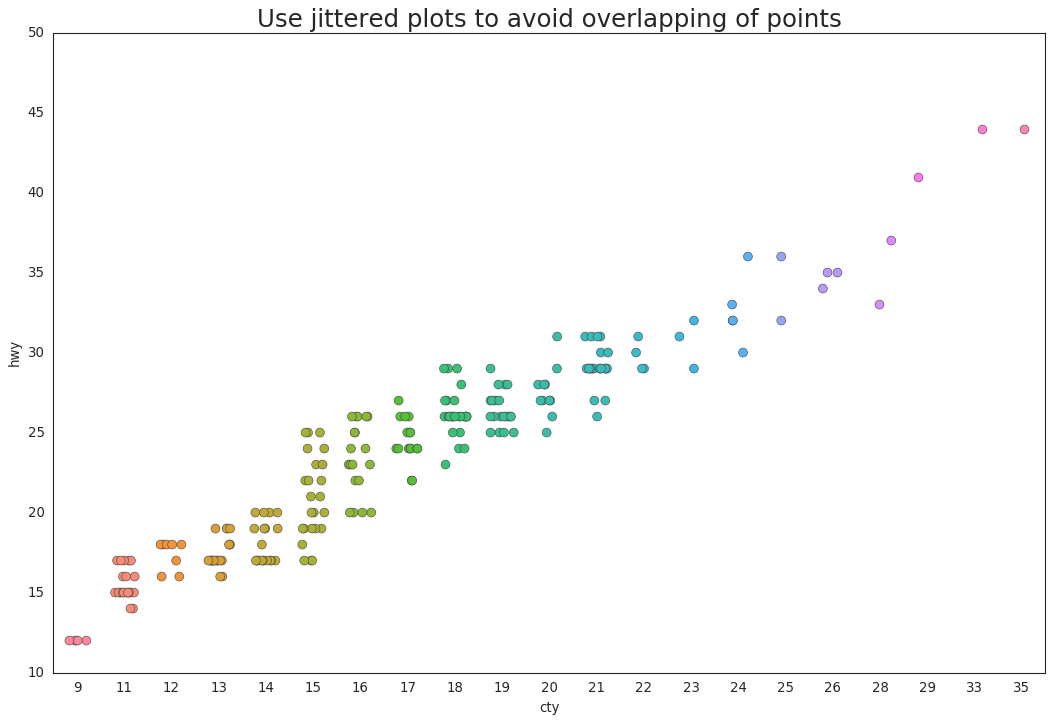

In [33]:
# Import Data
df = pd.read_csv("/kaggle/input/inputfiles/mpg_ggplot2.csv")

# Draw Stripplot
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
sns.stripplot(df.cty, df.hwy, jitter=0.25, size=8, ax=ax, linewidth=.5)

# Decorations
plt.title('Use jittered plots to avoid overlapping of points', fontsize=22)
plt.show()

## 5. Counts Plot
- A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable. The basic API and options are identical to those for barplot() , so you can compare counts across nested variables.
Input data can be passed in a variety of formats, including:

   -  Vectors of data represented as lists, numpy arrays, or pandas Series objects passed directly to the x, y, and/or hue parameters.

   -  A “long-form” DataFrame, in which case the x, y, and hue variables will determine how the data are plotted.

   -  A “wide-form” DataFrame, such that each numeric column will be plotted.

   -   An array or list of vectors.


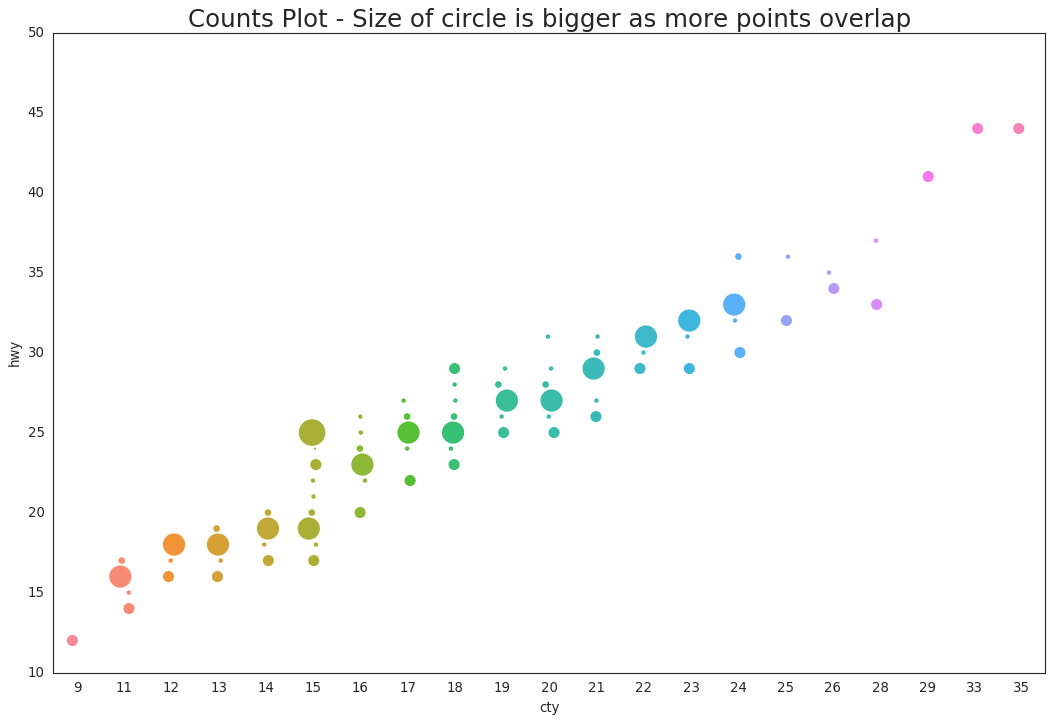

In [34]:
# Import Data
df = pd.read_csv("/kaggle/input/inputfiles/mpg_ggplot2.csv")
df_counts = df.groupby(['hwy', 'cty']).size().reset_index(name='counts')

# Draw Stripplot
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
sns.stripplot(df_counts.cty, df_counts.hwy, size=df_counts.counts*2, ax=ax)

# Decorations
plt.title('Counts Plot - Size of circle is bigger as more points overlap', fontsize=22)
plt.show()



## 6. Marginal Histogram
Marginal histograms are histograms added to the margin of each axis of a scatter plot for analyzing the distribution of each measure. ... This post shows you how to make marginal histograms for scatter plots, marginal bar charts for highlight tables, and explains the difference between the two.

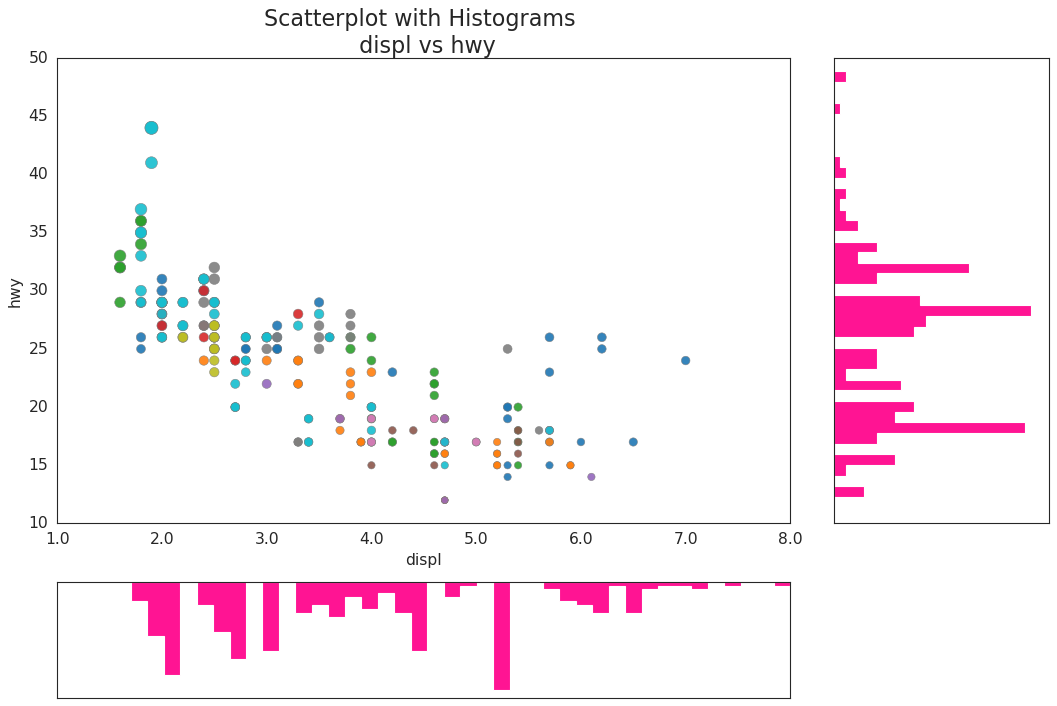

In [35]:
# Import Data
df = pd.read_csv("/kaggle/input/inputfiles/mpg_ggplot2.csv")

# Create Fig and gridspec
fig = plt.figure(figsize=(16, 10), dpi= 80)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

# Define the axes
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])

# Scatterplot on main ax
ax_main.scatter('displ', 'hwy', s=df.cty*4, c=df.manufacturer.astype('category').cat.codes, alpha=.9, data=df, cmap="tab10", edgecolors='gray', linewidths=.5)

# histogram on the right
ax_bottom.hist(df.displ, 40, histtype='stepfilled', orientation='vertical', color='deeppink')
ax_bottom.invert_yaxis()

# histogram in the bottom
ax_right.hist(df.hwy, 40, histtype='stepfilled', orientation='horizontal', color='deeppink')

# Decorations
ax_main.set(title='Scatterplot with Histograms \n displ vs hwy', xlabel='displ', ylabel='hwy')
ax_main.title.set_fontsize(20)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(14)

xlabels = ax_main.get_xticks().tolist()
ax_main.set_xticklabels(xlabels)
plt.show()

## 7. Marginal Boxplot
- Marginal boxplot is similar to marginal histogram plot.

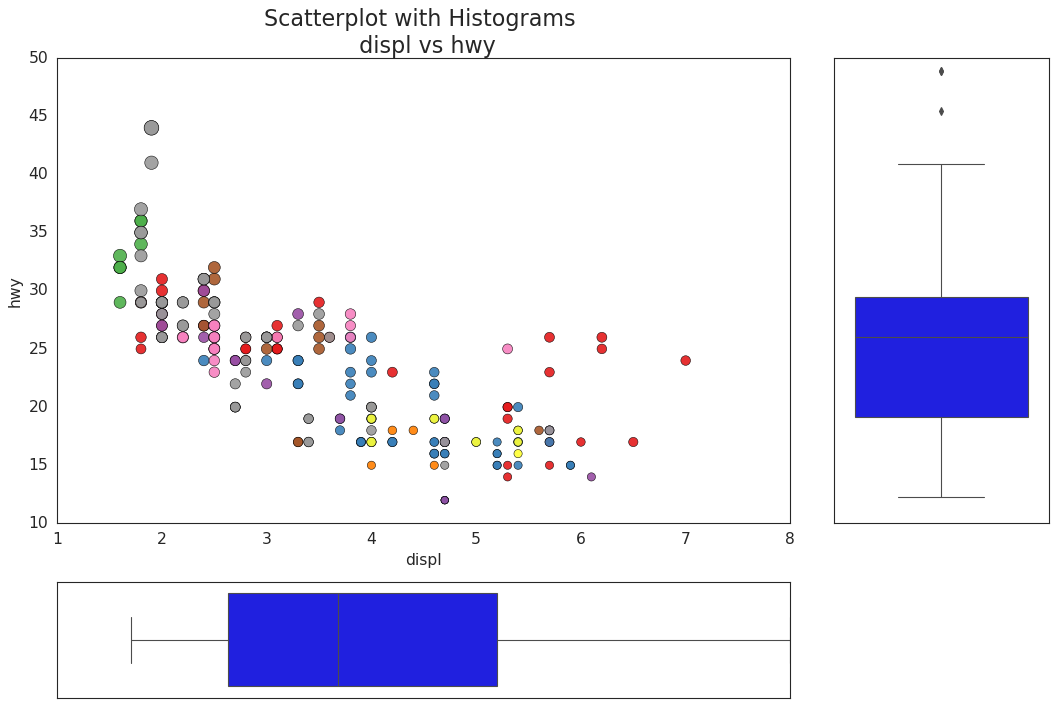

In [37]:
# Import Data
df = pd.read_csv("/kaggle/input/inputfiles/mpg_ggplot2.csv")

# Create Fig and gridspec
fig = plt.figure(figsize=(16, 10), dpi= 80)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

# Define the axes
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])

# Scatterplot on main ax
ax_main.scatter('displ', 'hwy', s=df.cty*5, c=df.manufacturer.astype('category').cat.codes, alpha=.9, data=df, cmap="Set1", edgecolors='black', linewidths=.5)

# Add a graph in each part
sns.boxplot(df.hwy, ax=ax_right, orient="v")
sns.boxplot(df.displ, ax=ax_bottom, orient="h")

# Decorations ------------------
# Remove x axis name for the boxplot
ax_bottom.set(xlabel='')
ax_right.set(ylabel='')

# Main Title, Xlabel and YLabel
ax_main.set(title='Scatterplot with Histograms \n displ vs hwy', xlabel='displ', ylabel='hwy')

# Set font size of different components
ax_main.title.set_fontsize(20)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(14)

plt.show()

## 8. Correllogram
- A correlogram (also called Auto Correlation Function ACF Plot or Autocorrelation plot) is a visual way to show serial correlation in data that changes over time (i.e. time series data). Serial correlation (also called autocorrelation) is where an error at one point in time travels to a subsequent point in time.

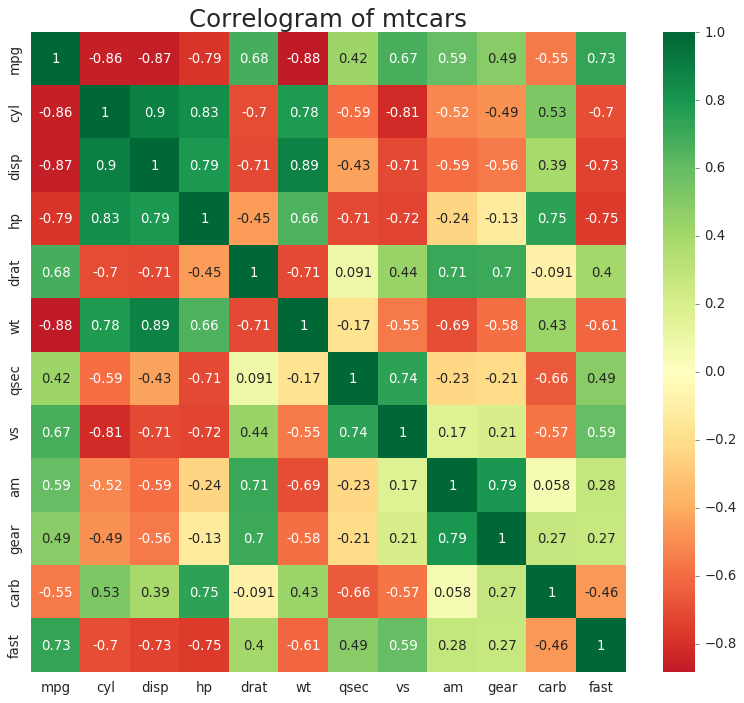

In [39]:
# Import Dataset
df = pd.read_csv("/kaggle/input/inputfiles/mtcars.csv")

# Plot
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram of mtcars', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## 9. Pairwise Plot
- A pairwise scatter plot is actually a matrix of scatter plots similar to a correlation matrix. Each pair of numeric variable is displayed vs the other one. It can quickly help us establish relationships.

<Figure size 800x640 with 0 Axes>

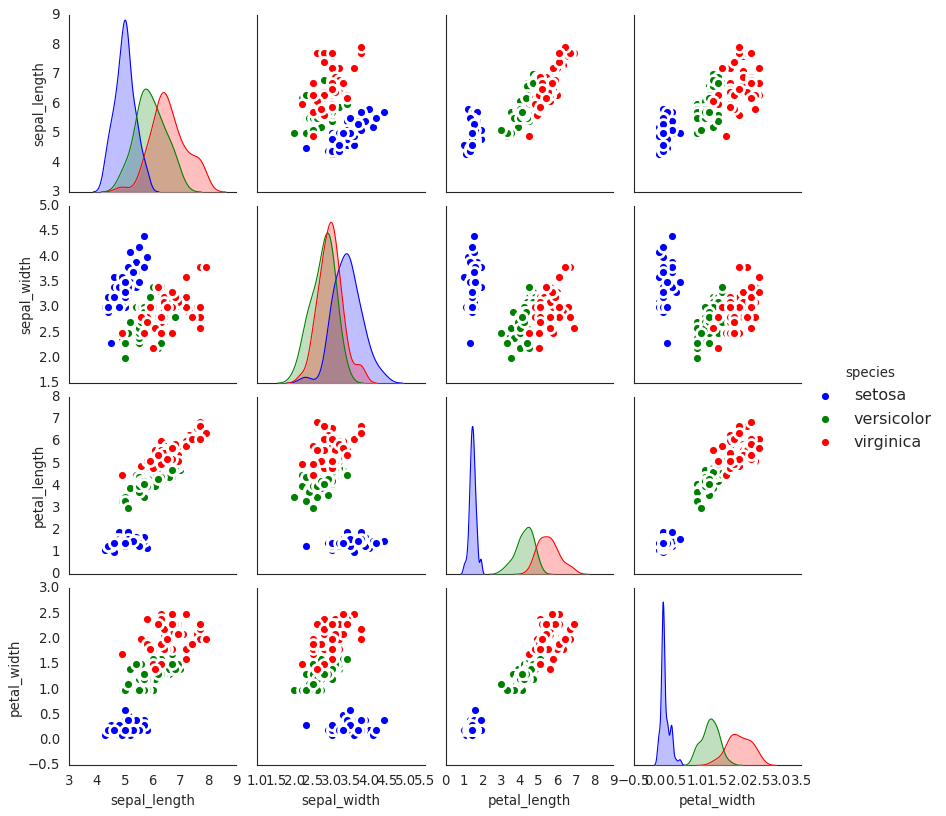

In [28]:
# Load Dataset
df = sns.load_dataset('iris')

# Plot
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(df, kind="scatter", hue="species", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

<Figure size 800x640 with 0 Axes>

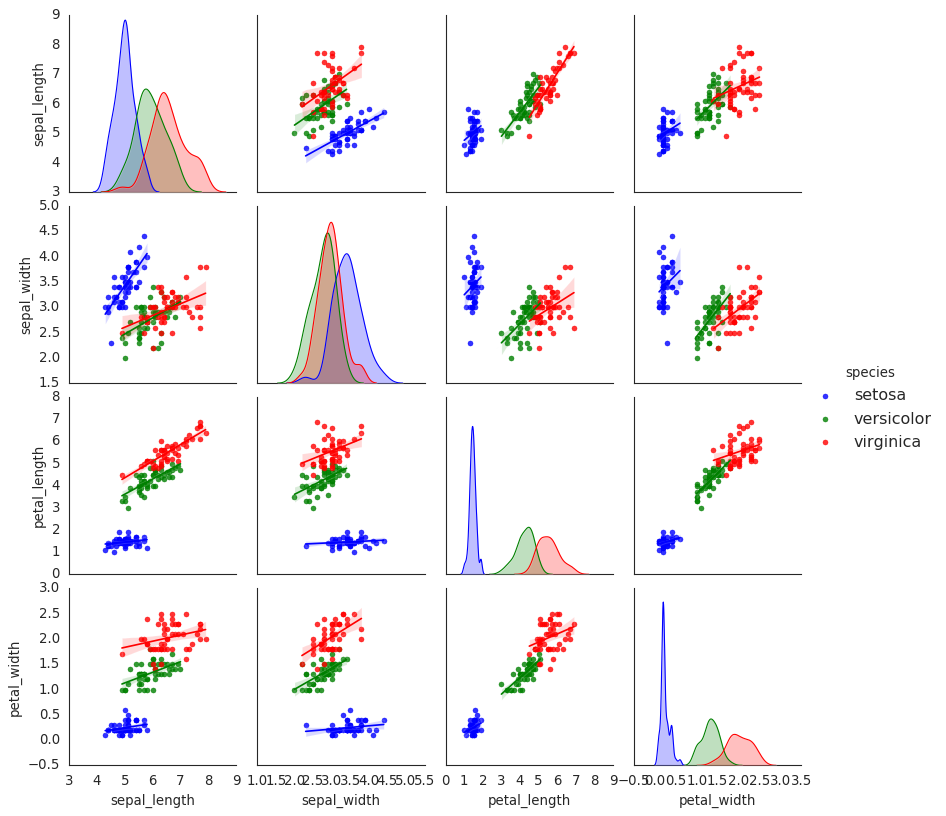

In [29]:
# Load Dataset
df = sns.load_dataset('iris')

# Plot
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(df, kind="reg", hue="species")
plt.show()

# Distribution Representation
Visualization methods that display frequency, how data spread out over an interval or is grouped.

   -  Box  and  Whisker Plot.
   -  Box and dot Plot.
   -  Bubble Chart.
   -  Density Plot.
   -  Dot Matrix Chart.
   -  Histogram.
   -  Multi-set Bar Chart.
   -  Parallel Sets.
   -  Pictogram Chart.

## 10. Box and Whisker Plot
- A Box and Whisker Plot (or Box Plot) is a convenient way of visually displaying the data distribution through their quartiles. 
- The lines extending parallel from the boxes are known as the “whiskers”, which are used to indicate variability outside the upper and lower quartiles. Outliers are sometimes plotted as individual dots that are in-line with whiskers. Box Plots can be drawn either vertically or horizontally. 


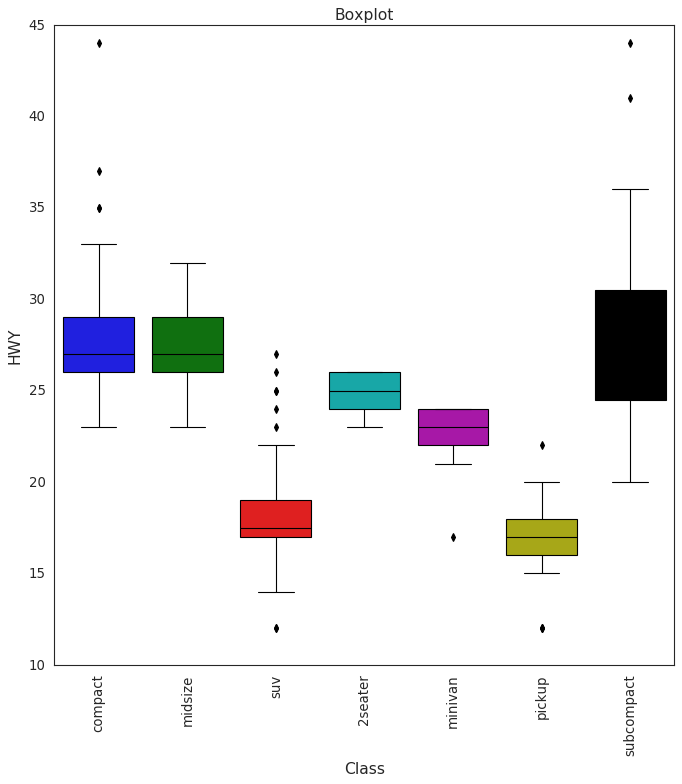

In [40]:
# get the data
df = pd.read_csv("/kaggle/input/inputfiles/mpg_ggplot2.csv")
plt.figure(figsize = (10, 10), dpi = 80)
# plot the data using seaborn
ax = sns.boxplot(x = "class", y = "hwy", data = df)
# change the font of the x and y ticks (numbers on the axis)
ax.tick_params(axis = 'x', labelrotation = 90, labelsize = 12)
ax.tick_params(axis = 'y', labelsize = 12)

# set and x and y label
ax.set_xlabel("Class", fontsize = 14)
ax.set_ylabel("HWY", fontsize = 14)

# set a title
ax.set_title("Boxplot", fontsize = 14);

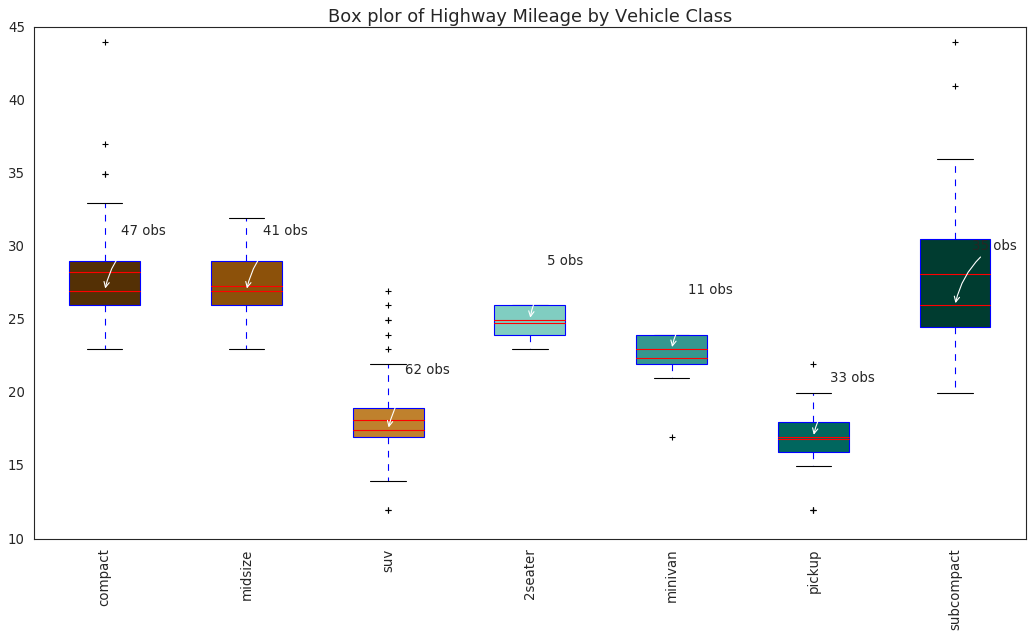

In [41]:
# get the data
df = pd.read_csv("/kaggle/input/inputfiles/mpg_ggplot2.csv")

# prepare the data for plotting

# vectors to plot
vects = [df[df["class"] == car]["hwy"] for car in df["class"].unique()]

# labels for the x axis
labels = [class_ for class_ in df["class"].unique()]

# handpicked colors
colors = ["#543005", "#8c510a", "#bf812d", "#80cdc1", "#35978f", "#01665e", "#003c30"]

# ----------------------------------------------------------------------------------------------------
# instanciate the figure
fig = plt.figure(figsize = (16, 8))
ax = fig.add_subplot()

# ----------------------------------------------------------------------------------------------------
# plot the data using matplotlib
plot1 = ax.boxplot(vects,
    notch = False, 
    vert = True,
    meanline = True,
    showmeans = True,
    patch_artist=True
)

# iterate over every box and add some annotations
for box, color, vect, label, tick in zip(plot1["boxes"], # using this line, you can iterate over every box
                                         colors, 
                                         vects, 
                                         labels, 
                                         ax.get_xticks()):
    # change the color of the box
    box.set(facecolor = color)
    # add text
    ax.annotate("{} obs".format(len(vect)), 
                xy = (tick, np.median(vect)),
               xytext = (15, 50),
               textcoords = "offset points",
               arrowprops = dict(arrowstyle = "->", connectionstyle = "arc3,rad=.2"),
               fontsize = 12)

# ----------------------------------------------------------------------------------------------------
# prettify the plot
# change the x labels
ax.set_xticklabels(labels = labels)

# change the rotation and the size of the x ticks (numbers of x axis)
ax.tick_params(axis = 'x', labelrotation = 90, labelsize = 12)

# set the title for the plot
ax.set_title("Box plor of Highway Mileage by Vehicle Class", fontsize = 16);

 ## 11. Dot and Box Plot
 - Dot and Box plot Conveys similar information as a boxplot split in groups. The dots, in addition, gives a sense of how many data points lie within each group.

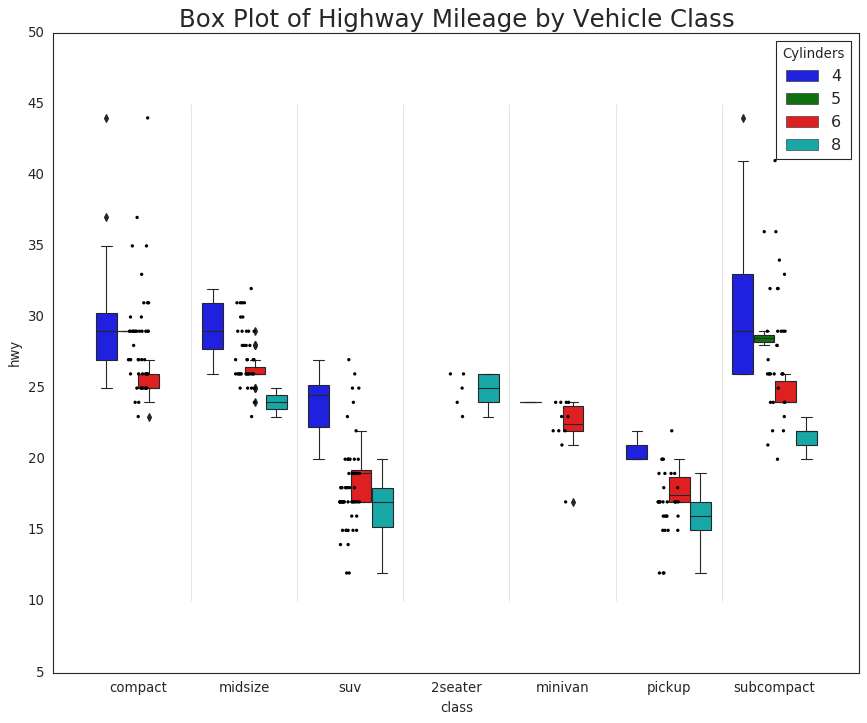

In [43]:
# Import Data
df = pd.read_csv("/kaggle/input/inputfiles/mpg_ggplot2.csv")

# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='class', y='hwy', data=df, hue='cyl')
sns.stripplot(x='class', y='hwy', data=df, color='black', size=3, jitter=1)

for i in range(len(df['class'].unique())-1):
    plt.vlines(i+.5, 10, 45, linestyles='solid', colors='gray', alpha=0.2)

# Decoration
plt.title('Box Plot of Highway Mileage by Vehicle Class', fontsize=22)
plt.legend(title='Cylinders')
plt.show()

## 12: Violin plot
- A violin plot is a method of plotting numeric data. It is similar to a box plot, with the addition of a rotated kernel density plot on each side. Violin plots are similar to box plots, except that they also show the probability density of the data at different values, usually smoothed by a kernel density estimator.

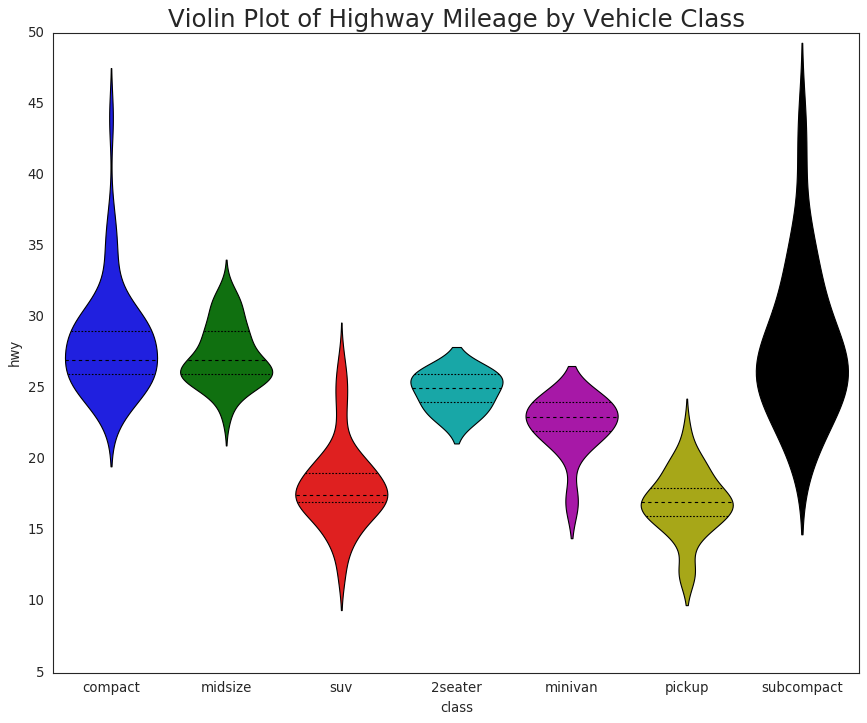

In [44]:
# Import Data
df = pd.read_csv("/kaggle/input/inputfiles/mpg_ggplot2.csv")

# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
sns.violinplot(x='class', y='hwy', data=df, scale='width', inner='quartile')

# Decoration
plt.title('Violin Plot of Highway Mileage by Vehicle Class', fontsize=22)
plt.show()

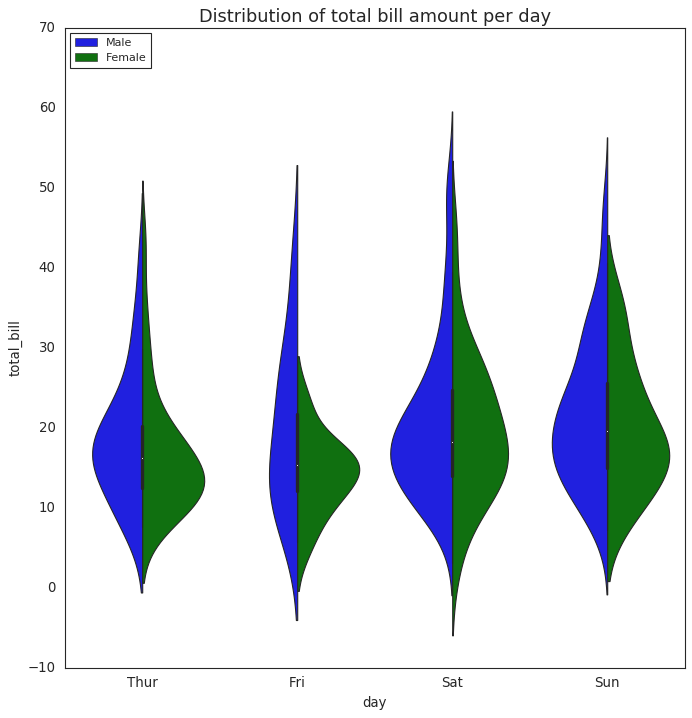

In [45]:
# get the data
tips = sns.load_dataset("tips")
# instanciate the figure
plt.figure(figsize = (10, 10), dpi= 80)
ax = sns.violinplot(x = "day", y = "total_bill", hue = "sex", split = True, data = tips)
# set a title and change the legend location
ax.set_title('Distribution of total bill amount per day', fontsize = 16)
ax.legend(loc = "upper left", fontsize = 10);

# 13.Bubble Chart.
- A Bubble Chart is a multi-variable graph that is a cross between a Scatterplot and a Proportional Area Chart. 
- Bubble Charts are typically used to compare and show the relationships between categorised circles, by the use of positioning and    proportions. The overall picture of Bubble Charts can be used to analyse for patterns/correlations. 

In [47]:
import plotly.express as px
df = px.data.gapminder()

fig = px.scatter(df.query("year==2007"), x="gdpPercap", y="lifeExp",
	         size="pop", color="continent",
                 hover_name="country", log_x=True, size_max=60)
fig.show()

# Categorical Bubble Charts

In [48]:
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
import math

# Load data, define hover text and bubble size
data = px.data.gapminder()
df_2007 = data[data['year']==2007]
df_2007 = df_2007.sort_values(['continent', 'country'])

hover_text = []
bubble_size = []

for index, row in df_2007.iterrows():
    hover_text.append(('Country: {country}<br>'+
                      'Life Expectancy: {lifeExp}<br>'+
                      'GDP per capita: {gdp}<br>'+
                      'Population: {pop}<br>'+
                      'Year: {year}').format(country=row['country'],
                                            lifeExp=row['lifeExp'],
                                            gdp=row['gdpPercap'],
                                            pop=row['pop'],
                                            year=row['year']))
    bubble_size.append(math.sqrt(row['pop']))

df_2007['text'] = hover_text
df_2007['size'] = bubble_size
sizeref = 2.*max(df_2007['size'])/(100**2)

# Dictionary with dataframes for each continent
continent_names = ['Africa', 'Americas', 'Asia', 'Europe', 'Oceania']
continent_data = {continent:df_2007.query("continent == '%s'" %continent)
                              for continent in continent_names}

# Create figure
fig = go.Figure()

for continent_name, continent in continent_data.items():
    fig.add_trace(go.Scatter(
        x=continent['gdpPercap'], y=continent['lifeExp'],
        name=continent_name, text=continent['text'],
        marker_size=continent['size'],
        ))

# Tune marker appearance and layout
fig.update_traces(mode='markers', marker=dict(sizemode='area',
                                              sizeref=sizeref, line_width=2))

fig.update_layout(
    title='Life Expectancy v. Per Capita GDP, 2007',
    xaxis=dict(
        title='GDP per capita (2000 dollars)',
        gridcolor='white',
        type='log',
        gridwidth=2,
    ),
    yaxis=dict(
        title='Life Expectancy (years)',
        gridcolor='white',
        gridwidth=2,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
)
fig.show()

# 14.Tree Chart.
*   Treemap of a rectangular DataFrame with continuous color argument in px.treemap
*  If a color argument is passed, the color of a node is computed as the average of the color values of its children, weighted by their values.
*  **Note:** for best results, ensure that the first path element is a single root node. In the examples below we are creating a dummy column containing identical values for each row to achieve this.



In [49]:
import plotly.express as px
import numpy as np
df = px.data.gapminder().query("year == 2007")
df["world"] = "world" # in order to have a single root node
fig = px.treemap(df, path=['world', 'continent', 'country'], values='pop',
                  color='lifeExp', hover_data=['iso_alpha'],
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(df['lifeExp'], weights=df['pop']))
fig.show()

# Treemap of a rectangular DataFrame with discrete color argument

In [51]:
import plotly.express as px
df = px.data.tips()
df["all"] = "all" # in order to have a single root node
fig = px.treemap(df, path=['all', 'sex', 'day', 'time'], values='total_bill', color='day')
fig.show()

# 15. Sunburst Charts 
* Sunburst plots visualize hierarchical data spanning outwards radially from root to leaves. 
* The sunburst sector hierarchy is determined by the entries in labels (names in px.sunburst) and in parents. 
* The root starts from the center and children are added to the outer rings.

In [50]:
import plotly.express as px
data = dict(
    character=["Eve", "Cain", "Seth", "Enos", "Noam", "Abel", "Awan", "Enoch", "Azura"],
    parent=["", "Eve", "Eve", "Seth", "Seth", "Eve", "Eve", "Awan", "Eve" ],
    value=[10, 14, 12, 10, 2, 6, 6, 4, 4])

fig =px.sunburst(
    data,
    names='character',
    parents='parent',
    values='value',
)
fig.show()

# Sunburst of a rectangular DataFrame

In [ ]:
import plotly.express as px
df = px.data.tips()
fig = px.sunburst(df, path=['day', 'time', 'sex'], values='total_bill')
fig.show()

# Sunburst of a rectangular DataFrame with continuous color argument 

In [ ]:
import plotly.express as px
import numpy as np
df = px.data.gapminder().query("year == 2007")
fig = px.sunburst(df, path=['continent', 'country'], values='pop',
                  color='lifeExp', hover_data=['iso_alpha'],
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(df['lifeExp'], weights=df['pop']))
fig.show()

# Sunburst of a rectangular DataFrame with discrete color argument

In [ ]:
import plotly.express as px
df = px.data.tips()
fig = px.sunburst(df, path=['sex', 'day', 'time'], values='total_bill', color='day')
fig.show()

# Sunburst with Repeated Labels

In [ ]:
import plotly.graph_objects as go

fig =go.Figure(go.Sunburst(
 ids=[
    "North America", "Europe", "Australia", "North America - Football", "Soccer",
    "North America - Rugby", "Europe - Football", "Rugby",
    "Europe - American Football","Australia - Football", "Association",
    "Australian Rules", "Autstralia - American Football", "Australia - Rugby",
    "Rugby League", "Rugby Union"
  ],
  labels= [
    "North<br>America", "Europe", "Australia", "Football", "Soccer", "Rugby",
    "Football", "Rugby", "American<br>Football", "Football", "Association",
    "Australian<br>Rules", "American<br>Football", "Rugby", "Rugby<br>League",
    "Rugby<br>Union"
  ],
  parents=[
    "", "", "", "North America", "North America", "North America", "Europe",
    "Europe", "Europe","Australia", "Australia - Football", "Australia - Football",
    "Australia - Football", "Australia - Football", "Australia - Rugby",
    "Australia - Rugby"
  ],
))
fig.update_layout(margin = dict(t=0, l=0, r=0, b=0))

fig.show()

# 16. Gantt Charts
* A Gantt chart is a type of bar chart that illustrates a project schedule.
* The chart lists the tasks to be performed on the vertical axis, and time intervals on the horizontal axis. 
* The width of the horizontal bars in the graph shows the duration of each activity.